# Import libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

from collections import Counter

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import ClusterCentroids

from scipy.stats.mstats import winsorize

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#Import the model and graphical functions
from IPython.display import Image

import pydotplus
import graphviz
import datetime

%matplotlib inline

# Dataset

In [110]:
path = 'C:/Users/jmedel/OneDrive - Avangard Innovative/coding/Classification Baler/'

# import the dataset
audit_df = pd.read_csv(path + 'v_ml_baler_classification_source.csv')

In [111]:
len(audit_df)

98922

In [112]:
# remove any data that was created prior to 2018 - this would not be valid data
audit_df.drop(audit_df[(audit_df.package_date < '2018-01-01')].index, inplace=True)
audit_df.drop(audit_df[(audit_df.device_type != 'Baler')].index, inplace=True)

# sort the dataframe by device id and package date
audit_df.sort_values(['device_id', 'package_date'], ascending = [False, True], inplace=True)

## Explore the dataset

In [113]:
audit_df.head(3).T
#np.round(audit_df, decimals=3)

,49319,61826,75252
device_type,Baler,Baler,Baler
device_id,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f
device_code,HEMM1004,HEMM1004,HEMM1004
package_id,34,35,36
package_date,2018-07-07 06:23:02,2018-07-08 05:14:05,2018-07-09 03:35:17
id,7f77a0b7-f2bf-48f8-ac7d-f616b750b93e,a000ce9b-b4d9-415d-bcbb-357f10a6d444,c2f2c564-04c9-4a0a-af72-d40dbca4f7d7
img_url,7f77a0b7-f2bf-48f8-ac7d-f616b750b93e,a000ce9b-b4d9-415d-bcbb-357f10a6d444,c2f2c564-04c9-4a0a-af72-d40dbca4f7d7
material_type,A,A,A
unit,KG,KG,KG
net_weight,480,428,450


In [114]:
audit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97925 entries, 49319 to 21023
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   device_type                         97925 non-null  object 
 1   device_id                           97925 non-null  object 
 2   device_code                         97925 non-null  object 
 3   package_id                          97925 non-null  int64  
 4   package_date                        97925 non-null  object 
 5   id                                  97925 non-null  object 
 6   img_url                             90938 non-null  object 
 7   material_type                       97925 non-null  object 
 8   unit                                97925 non-null  object 
 9   net_weight                          97925 non-null  float64
 10  tare_weight                         70717 non-null  float64
 11  gross_weight                        8

In [115]:
audit_df.describe()

,package_id,net_weight,tare_weight,gross_weight,ext_printed,ir_confidence
count,97925.000000,9.792500e+04,70717.000000,8.036400e+04,97925.000000,28523.000000
mean,702.835282,3.341314e+04,0.039877,2.787636e+04,0.030513,0.948951
std,684.895964,8.057940e+05,2.715141,7.374261e+05,0.311681,0.111675
min,1.000000,-1.310000e+02,0.000000,-1.310000e+02,0.000000,0.351665
25%,215.000000,3.520000e+02,0.000000,0.000000e+00,0.000000,0.971363
50%,507.000000,4.100000e+02,0.000000,3.550000e+02,0.000000,0.999170
75%,955.000000,4.580000e+02,0.000000,4.310000e+02,0.000000,0.999987
max,5193.000000,1.976730e+07,453.000000,1.976730e+07,40.000000,1.000000


In [116]:
audit_df.groupby('audit_status')['audit_status'].count()

audit_status
A    87561
C     1092
R     9272
Name: audit_status, dtype: int64

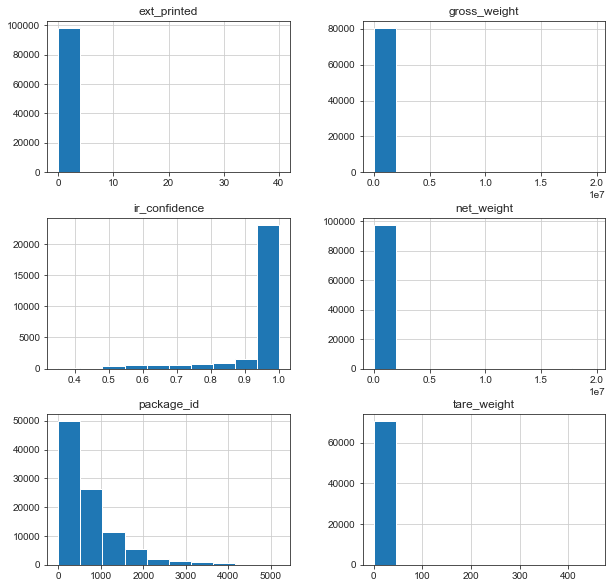

In [117]:
audit_df.hist(bins=10, figsize=(10,10))
plt.show()

## Data pre-processing

### Missing values

In [118]:
# Fill in all the NaN values with zero as we do not want to deprecate the data 
audit_df.fillna(0, inplace=True)

### Feature engineering functions

#### audited

In [119]:
audit_df['audit_status'].value_counts()

A    87561
R     9272
C     1092
Name: audit_status, dtype: int64

In [120]:
# Create numerical categories for audit status: accept, reject or change
def audited(audit):
    if audit == 'A':
        return 0
    elif audit == 'R':
        return 1
    else:
        return 1
    
# use .apply() method to call the function
audit_df['audited'] = audit_df['audit_status'].apply(audited)

print(audit_df.groupby('audited')['audited'].count())

audited
0    87561
1    10364
Name: audited, dtype: int64


In [121]:
#Create dummy variables for img_url
def image_present(image):
    if image == 0:
        return 0
    else:
        return 1
    
# use .apply() method by calling the function
audit_df['img_url'] = audit_df['img_url'].apply(image_present)

print(audit_df.groupby('img_url')['img_url'].count())

img_url
0     6987
1    90938
Name: img_url, dtype: int64


#### barcode

In [122]:
# create dummy variables for barcode category
# first need to fill in the missing values
audit_df['barcode'].fillna(value=0, inplace=True)

def label_present(label):
    if label == 0:
        return 0
    else:
        return 1
    
audit_df['label'] = audit_df['barcode'].apply(label_present)

# convert the caterogy into int
audit_df['label']  = pd.to_numeric(audit_df['label']).astype(int)

print(audit_df.groupby('label')['label'].count())

label
0    46801
1    51124
Name: label, dtype: int64


In [123]:
audit_df[audit_df['barcode'] != 0][['barcode','label']].head()

,barcode,label
86480,hemm10041812110A043304330001,1
51588,hemm10041812120A036303630002,1
45399,hemm10041812120B020502050003,1
33927,hemm10041812120B006800680004,1
85982,hemm10041812130A044004400005,1


#### material category

In [124]:
audit_df['material_description_from_original'].value_counts().index

Index(['CARTON', 'PLAYO', '.', 'OCC', 'FILM', 'LLD FILM', 'FLX PUR 21620',
       'BOMA', 'FILM A', 'TEST', 'FEHRER 21294', 'CARDBOARD',
       'PRODUCTO TERMINADO', 'SHRINK WRAP', 'CARTON REPROCESO', 'Default',
       'cc', 'PET STRAPPING', 'FLX PUR RES-N 21097', 'OCC BALED', 'PLMX',
       'MIXTO REPROCESO', 'Playo', 'PLASTICSTRAP', 'LDP GRADE B',
       'WDFOAM 21097', 'GRADE A FILM BALED', 'LDP FURNITURE', 'PPH',
       'CARPET PAD', 'ALUMINUM', 'pap-11a0-123456789', 'OTHER PLASTIC',
       'OCC-SMALL BALE', 'EPSB', 'LDP GRADE A', 'B', 'REPLAS', 'LLD GRADE C',
       'LLDPE-BULK', 'OCC-BULK', 'LLD GRADE A'],
      dtype='object')

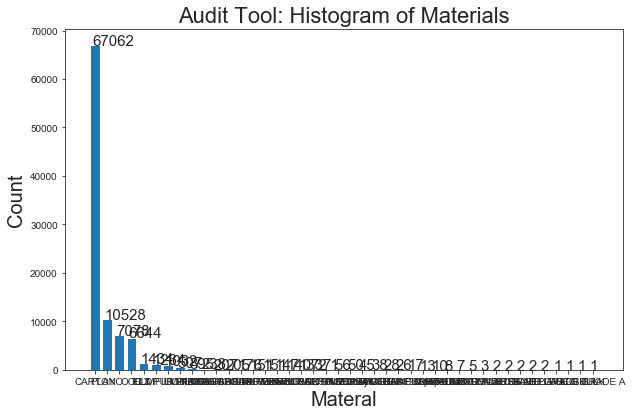

In [125]:
plt.figure(figsize=(10,6))

material = audit_df['material_description_from_original'].value_counts()
bars = audit_df['material_description_from_original'].value_counts().index

plt.bar(bars, material)

y_pos = np.arange(len(bars))

for i, v in enumerate(material):
     plt.text(y_pos[i] - 0.25, v + 0.15, str(v), size = 15)  

plt.title('Audit Tool: Histogram of Materials', fontsize=22)
plt.ylabel('Count', fontsize= 20)
plt.xlabel('Materal', fontsize = 20)
plt.subplots_adjust(bottom= 0.2, top = 0.99)
plt.show()

In [126]:
audit_df['material_description_from_original'].unique()

array(['CARTON', 'PLAYO', 'OCC', '.', 'CARDBOARD', 'TEST', 'FILM',
       'PLASTICSTRAP', 'ALUMINUM', 'LLD FILM', 'OCC BALED',
       'GRADE A FILM BALED', 'LDP GRADE A', 'LLD GRADE C',
       'LDP FURNITURE', 'LDP GRADE B', 'B', 'FILM A', 'PET STRAPPING',
       'PPH', 'OCC-BULK', 'LLDPE-BULK', 'OCC-SMALL BALE', 'BOMA',
       'LLD GRADE A', 'Default', 'SHRINK WRAP', 'cc', 'EPSB', 'Playo',
       'PRODUCTO TERMINADO', 'CARTON REPROCESO', 'MIXTO REPROCESO',
       'FLX PUR 21620', 'WDFOAM 21097', 'FLX PUR RES-N 21097',
       'FEHRER 21294', 'CARPET PAD', 'PLMX', 'REPLAS',
       'pap-11a0-123456789', 'OTHER PLASTIC'], dtype=object)

In [127]:
# redefine material_description to create fewer categories
def material_class(material):
    
    material = material.upper()
    
    if material == 'CARTON':
        return 'OCC'
    elif material == 'CC':
        return 'OCC'
    elif material == 'CARDBOARD':
        return 'OCC'
    elif material == 'OCC BALED':
        return 'OCC'
    elif material == 'OCC':
        return 'OCC'
    elif material == 'pap-PLAYOPLAYOaOCC-PLAYOEPSPETMETALHDPOTHER789':
        return 'OCC'
    elif material == 'CARTON REPROCESO':
        return 'OCC'
    elif material == 'OCC-BULK':
        return 'OCC'
    elif material == 'OCC-SMALL BALE':
        return 'OCC'
    
    elif material == 'FILM':
        return 'FILM'
    elif material == 'PLAYO':
        return 'FILM'
    elif material == 'FILM A':
        return 'FILM'
    elif material == 'GRADE A FILM BALED':
        return 'FILM'
    elif material == 'LDP-FL-SFNA-AVUOCCPLAYO':
        return 'FILM'
    elif material == 'LLD FILM':
        return 'FILM'
    elif material == 'PLMX':
        return 'FILM'
    elif material == 'SHRINK WRAP':
        return 'FILM'
    elif material == 'BOMA':
        return 'FILM'
    elif material == 'LLDPE-BULK':
        return 'FILM'
    elif 'LLD' in material:
        return 'FILM'
    
    elif material == 'EPS':
        return 'OTHER' # 'EPS'
    elif material == 'EPS FOAM':
        return 'OTHER' # 'EPS'
    elif material == 'EPSB':
        return 'OTHER' # 'EPS'
    elif material == 'PET':
        return 'OTHER' # 'PET'
    elif material == 'PET STRAPPING':
        return 'OTHER' # 'PET'
    elif material == 'STF':
        return 'OTHER' # 'PET'
    elif material == 'METAL':
        return 'OTHER' # 'METAL'
    elif material == 'ALUMINUM':
        return 'OTHER' # 'METAL'
    elif material == 'HDP':
        return 'OTHER' # 'HDP'
    elif material == 'MILK BOTTLE':
        return 'OTHER' # 'HDP'
    elif material == 'HDP-RG':
        return 'OTHER' # 'HDP'
    elif material == 'HDP - FILM':
        return 'OTHER' #'HDP'
    elif material == 'IGLOO':
        return 'OTHER' # 'HDP'    
    else:
        return 'OTHER'

In [128]:
#use .apply() method by calling the function above.
audit_df['material'] = audit_df['material_description_from_original'].apply(material_class)

#Convert the caterogies into int
#audit_df['material']  = pd.to_numeric(audit_df['material']).astype(string)

In [129]:
print(audit_df.groupby('material')['material'].count())

material
FILM     14370
OCC      74276
OTHER     9279
Name: material, dtype: int64


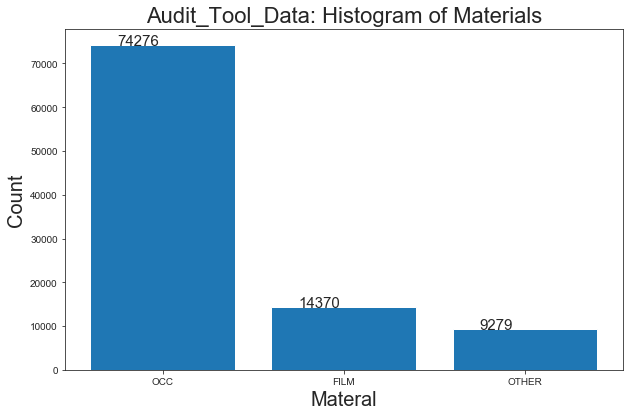

In [130]:
plt.figure(figsize=(10,6))

material = audit_df.groupby('material')['material'].count().nlargest(7)
bars = material.index

plt.bar(bars, material)

y_pos = np.arange(len(bars))

for i, v in enumerate(material):
     plt.text(y_pos[i] - 0.25, v + 0.15, str(v), size = 15)  

plt.title('Audit_Tool_Data: Histogram of Materials', fontsize=22)
plt.ylabel('Count', fontsize= 20)
plt.xlabel('Materal', fontsize = 20)
plt.subplots_adjust(bottom= 0.2, top = 0.99)
plt.show()

#### package_date

In [131]:
# Convert the date related fields into date.time
audit_df['package_date']   = pd.to_datetime(audit_df['package_date'])

# Create a new field imputing the secs for package_date
audit_df['package_date_f'] = audit_df['package_date'].dt.strftime("%m/%d/%Y %H:%M").astype('datetime64')

In [132]:
audit_df.head(2)

,device_type,device_id,device_code,package_id,package_date,id,img_url,material_type,unit,net_weight,...,material_description_from_original,material_class_from_original,audit_status,ir_original_class,ir_class,ir_confidence,audited,label,material,package_date_f
49319,Baler,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,HEMM1004,34,2018-07-07 06:23:02,7f77a0b7-f2bf-48f8-ac7d-f616b750b93e,1,A,KG,480.0,...,CARTON,BALED CARDBOARD,A,0,0,0.0,0,0,OCC,2018-07-07 06:23:00
61826,Baler,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,HEMM1004,35,2018-07-08 05:14:05,a000ce9b-b4d9-415d-bcbb-357f10a6d444,1,A,KG,428.0,...,CARTON,BALED CARDBOARD,A,0,0,0.0,0,0,OCC,2018-07-08 05:14:00


#### time_delta

In [133]:
# Create new feature: time interval between package dates for each unique device_id to determine 'event'
# Will use a function; so first need to define the function
def diff_func(df):
    return df.diff().dt.total_seconds() / 60

# Now call the function using .apply
audit_df['time_delta'] = audit_df.groupby(['device_id'])['package_date_f'].apply(diff_func)

# Fill in any NaN values
audit_df['time_delta'].fillna('0', inplace=True)

# Convert the output into a float
audit_df['time_delta'] = pd.to_numeric(audit_df['time_delta']).astype(float)

In [134]:
audit_df['device_code'].value_counts()

WALM1008    5644
WALM1001    5061
WALM1012    3654
WALM1006    3137
WALM1005    3021
            ... 
AMZS1002       1
RWST1005       1
AMZS1014       1
AMZS1021       1
WALG1002       1
Name: device_code, Length: 140, dtype: int64

In [135]:
def first_delta(df):
    
    df.iloc[0] = round((df.sum() / df.count()),2)
    return df

# call the function to mark the first time_delta
audit_df['time_delta'] = audit_df.groupby(['device_id'])['time_delta'].apply(first_delta)

In [136]:
audit_df[['id','time_delta']].head(3)

,id,time_delta
49319,7f77a0b7-f2bf-48f8-ac7d-f616b750b93e,1062.36
61826,a000ce9b-b4d9-415d-bcbb-357f10a6d444,1371.00
75252,c2f2c564-04c9-4a0a-af72-d40dbca4f7d7,1341.00


#### standard_weight

In [137]:
# Standardize all the weights by making everything KGs
def standard_weight(row):
    if row['unit'] == 'LB':
        return round(row['net_weight'] * 0.453592 , 2)
    else:
        return row['net_weight']
    
audit_df['standard_weight'] = audit_df.apply(standard_weight, axis =1)

In [138]:
# Create new feature: variance in weight from one event + material type to the next event + cmaterial type

# First calculate average weight for each material by device and apply to all dataframe
audit_df['standard_w_avg'] = audit_df.groupby(['device_id','material'])['standard_weight'].transform(np.mean)

# Now calculate st dev for each material weight by device and apply to all dataframe
audit_df['standard_w_std'] = audit_df.groupby(['device_id','material'])['standard_weight'].transform(np.std)

# Fill in any NaN values
audit_df['standard_w_std'].fillna('0', inplace=True)

# Convert the caterogy into int
audit_df['standard_w_std']  = pd.to_numeric(audit_df['standard_w_std']).astype(int)

# Check results
audit_df[['device_id','material','standard_weight', 'standard_w_avg', 'standard_w_std']].head(3)

,device_id,material,standard_weight,standard_w_avg,standard_w_std
49319,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,480.0,421.521978,92
61826,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,428.0,421.521978,92
75252,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,450.0,421.521978,92


In [139]:
audit_df.loc[audit_df['unit'] == 'LB', ['unit', 'net_weight', 'standard_weight']].head(3)

,unit,net_weight,standard_weight
80203,LB,1007.0,456.77
79892,LB,1005.0,455.86
10105,LB,1006.0,456.31


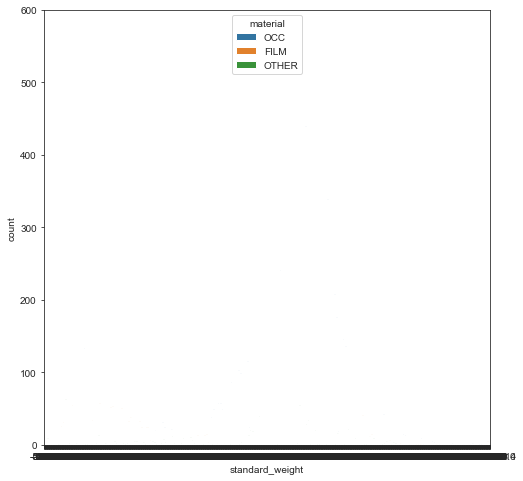

In [140]:
plt.figure(figsize=(8,8))
sns.countplot(hue='material', x='standard_weight', data=audit_df)
plt.ylim(0, 600)
plt.show()

In [141]:
audit_df[['standard_weight','time_delta']].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,standard_weight,time_delta
0.00,-59.42,0.00
0.01,37.00,0.00
0.25,329.00,131.00
0.50,405.00,397.00
0.75,439.98,1059.00
0.99,733.00,7006.76
1.00,19767300.00,1010967.00


In [142]:
len(audit_df)

97925

In [143]:
# Adjust data for outliers on weights and time deltas
def using_mstats(s):
    return winsorize(s, limits=[0.01, 0.01])

audit_df[['standard_weight','time_delta']] = audit_df[[
          'standard_weight','time_delta']].apply(using_mstats, axis=0)
    
audit_df[['standard_weight','time_delta']].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

,standard_weight,time_delta
0.00,37.00,0.00
0.01,37.00,0.00
0.25,329.00,131.00
0.50,405.00,397.00
0.75,439.98,1059.00
0.99,733.00,7006.76
1.00,733.00,7007.00


In [144]:
len(audit_df)

97925

In [145]:
audit_df['mad_weight'] = abs(audit_df['standard_weight'] - audit_df['standard_w_avg'])

#Check results
#round(audit_df[['device_id','Material','standard_weight', 'standard_w_avg', 'standard_w_std', 
#                'mad_weight']],3)

In [146]:
audit_df['mad_var'] = audit_df['mad_weight'] / audit_df['standard_w_std']

#Check results
round(audit_df[['device_id','material','standard_weight', 'standard_w_avg', 'standard_w_std', 
                'mad_weight', 'mad_var']],3).head(3)

,device_id,material,standard_weight,standard_w_avg,standard_w_std,mad_weight,mad_var
49319,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,480.0,421.522,92,58.478,0.636
61826,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,428.0,421.522,92,6.478,0.070
75252,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,450.0,421.522,92,28.478,0.310


In [147]:
# groupby(['device_id','Material'])['mad_var'].

# Now create a function to convert the mad_var into a binary classifier
def weight_var(row):
    if row['mad_var'] > 1:
        return '1'
    else:
        return '0'
    
# Now call the function using .apply
audit_df['weight_var_index'] = audit_df.apply(weight_var, axis=1)

# Convert the caterogies into int
audit_df['weight_var_index'] = pd.to_numeric(audit_df['weight_var_index']).astype(int)

In [148]:
# Check results
round(audit_df[['device_id','material','standard_weight', 'standard_w_avg', 'standard_w_std', 
                'mad_weight', 'mad_var', 'weight_var_index']].head(3),3).head()

,device_id,material,standard_weight,standard_w_avg,standard_w_std,mad_weight,mad_var,weight_var_index
49319,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,480.0,421.522,92,58.478,0.636,0
61826,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,428.0,421.522,92,6.478,0.070,0
75252,fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f,OCC,450.0,421.522,92,28.478,0.310,0


In [149]:
# Now create a function to convert the mad_var into a binary classifier
def weight_var(row):
    if row['mad_var'] > 1:
        return '1'
    else:
        return '0'
    
# Now call the function using .apply
audit_df['weight_var_index'] = audit_df.apply(weight_var, axis=1)

# Convert the caterogies into int
audit_df['weight_var_index'] = pd.to_numeric(audit_df['weight_var_index']).astype(int)

#### audited - validation

In [150]:
def validate_audit(df):
    
    if len(df) > 2:
        if 1 in df.to_list():  
            df.iloc[0] = 2
            df.iloc[1:] = 1

        elif 0 in df.to_list():
            df.iloc[0] = 0
            df.iloc[1:] = 1
            
    return df

In [151]:
audit_df['audit_status_v'] = audit_df.groupby(['device_id','package_id',
                                               'standard_weight','package_date_f','material'])['audited'].apply(validate_audit)

In [152]:
audit_df.groupby(['device_id','package_id','standard_weight','package_date_f','material'])['audited'].count()

device_id                             package_id  standard_weight  package_date_f       material
02467072-ffd6-432e-ab02-97e477ee3f94  7           505.0            2018-05-18 18:55:00  OCC         1
                                      8           519.0            2018-05-18 22:26:00  OCC         1
                                      9           271.0            2018-05-19 00:28:00  FILM        1
                                      10          509.0            2018-05-19 06:40:00  OCC         1
                                      11          499.0            2018-05-20 21:37:00  OCC         1
                                                                                                   ..
fe8e3fb1-0689-4bb3-9b5a-154bfe85d08f  758         468.0            2020-05-16 22:17:00  OCC         1
                                      759         479.0            2020-05-17 13:36:00  OCC         1
                                      760         367.0            2020-05-18 05:54:00 

In [153]:
audit_df['material'].unique()

array(['OCC', 'FILM', 'OTHER'], dtype=object)

In [154]:
audit_df[audit_df['material'] == 'OTHER']['audit_status_v'].value_counts()

0    8517
1     762
Name: audit_status_v, dtype: int64

#### duplicate_readings

In [155]:
#audit_df['duplicate_counts'] = audit_df.groupby(['device_id','package_id','standard_weight','package_date_f','material']).cumcount().astype(int)

In [156]:
audit_df['duplicate_counts'] = audit_df.groupby(['device_id','standard_weight','package_date_f','material']).cumcount().astype(int)

In [157]:
audit_df[(audit_df['device_id'] == 'e9fd0a4e-7169-4d74-aefe-996dbc1b1118') & 
         (audit_df['standard_weight'] == 134.72) & 
         (audit_df['package_date_f'] == '2019-12-02 18:35:00')].T

,66123,75200,34753,41037,32628,84703,65369,8648,54332,91408,65521,68920
device_type,Baler,Baler,Baler,Baler,Baler,Baler,Baler,Baler,Baler,Baler,Baler,Baler
device_id,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118,e9fd0a4e-7169-4d74-aefe-996dbc1b1118
device_code,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001,BESC1001
package_id,187,188,189,190,191,192,193,194,195,196,197,198
package_date,2019-12-02 18:35:01,2019-12-02 18:35:17,2019-12-02 18:35:18,2019-12-02 18:35:35,2019-12-02 18:35:36,2019-12-02 18:35:39,2019-12-02 18:35:47,2019-12-02 18:35:48,2019-12-02 18:35:51,2019-12-02 18:35:54,2019-12-02 18:35:55,2019-12-02 18:35:59
id,ab3c94ef-b1c3-4719-9f19-b1eba373580e,c2d79ebd-c1bf-48bc-9631-faa58607b1c8,599d8fb9-6cfe-4416-8dfb-78795a6c44d6,6a1661e6-6694-460e-b153-a4ad53c7bf53,54271239-41f5-4845-85b0-2c26cfb5a1e4,db78fbdd-bf66-409a-a175-b0ffc6d7642c,a958a5f1-1826-4f77-aacd-440208d09307,167b2229-1203-442f-80e9-b0750b8be6b3,8c43b24b-eb3a-4c13-bc15-f03b445f0b1b,ec96ff8f-1e26-4595-b24a-b9da5dd925aa,a9b27090-2db3-44c8-b40e-696e99589c75,b2a88098-125d-4c23-8b1c-e7dceee52798
img_url,1,1,1,1,1,1,1,1,1,1,1,1
material_type,B,B,B,B,B,B,B,B,B,B,B,B
unit,LB,LB,LB,LB,LB,LB,LB,LB,LB,LB,LB,LB
net_weight,297,297,297,297,297,297,297,297,297,297,297,297


In [158]:
dim  = list(audit_df.duplicate_counts.unique())
dim

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [159]:
audit_df.loc[audit_df['duplicate_counts'] > 375][['device_id','standard_weight','package_date_f','material']]

,device_id,standard_weight,package_date_f,material


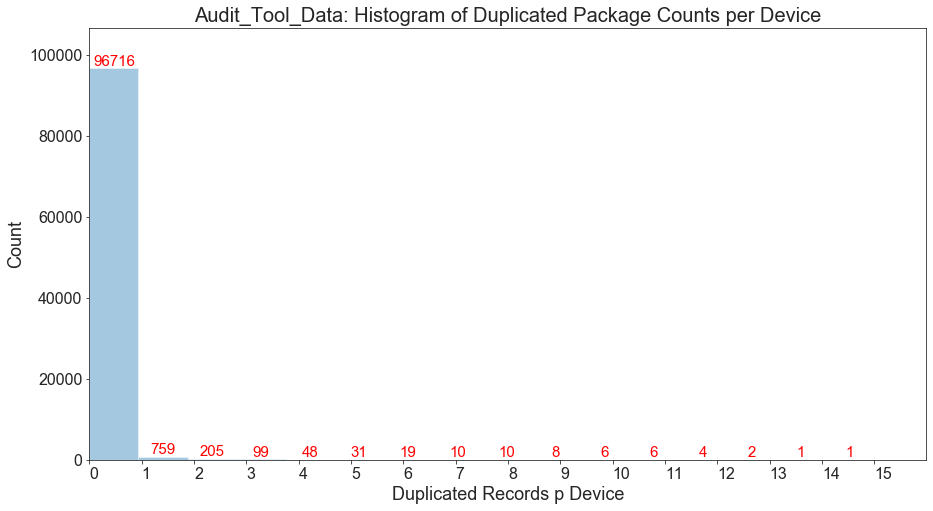

In [160]:
# Distribution of duplicate package ID counts by device
duplicates = audit_df['duplicate_counts']
dim  = list(duplicates.unique())

plt.figure(figsize=(15,8))
sns.distplot(duplicates, bins=len(dim), kde=False)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = duplicates.value_counts().max() 
ax.set_ylim([0, y_max + 10000])
ax.set_xlim([0, len(dim)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize= 15, color='red', ha='center', va='bottom')

# Custom the subplot layout
plt.subplots_adjust(bottom=0.2, top=.95)
ax.set_title('Audit_Tool_Data: Histogram of Duplicated Package Counts per Device', fontsize=20)
plt.yticks(size = len(dim))
plt.xticks(dim, size = len(dim), ha='left')
plt.ylabel('Count', fontsize= 18)
plt.xlabel('Duplicated Records p Device', fontsize = 18)
plt.show()

#### duplicate_counts_binary

In [161]:
# convert the duplicate records to 0 & 1
audit_df['duplicate_counts_binary'] = np.where(audit_df['duplicate_counts'] > 0, 1, 0)

In [162]:
audit_df['duplicate_counts_binary'].value_counts()

0    96716
1     1209
Name: duplicate_counts_binary, dtype: int64

In [163]:
# #Adjust data for outliers on weights and time deltas

# def using_mstats(s):
#     return winsorize(s, limits=[0.01, 0.05])

# audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta',
#           'standard_w_avg', 'standard_w_std', 'mad_weight']] = audit_df[[
#           'net_weight', 'gross_weight', 'standard_weight','time_delta',
#           'standard_w_avg', 'standard_w_std', 'mad_weight']].apply(using_mstats, axis=0)
    
# audit_df[['net_weight', 'gross_weight', 'standard_weight','time_delta',
#          'standard_w_avg', 'standard_w_std', 'mad_weight']].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1])

### Data Distribution

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text yticklabel objects>)

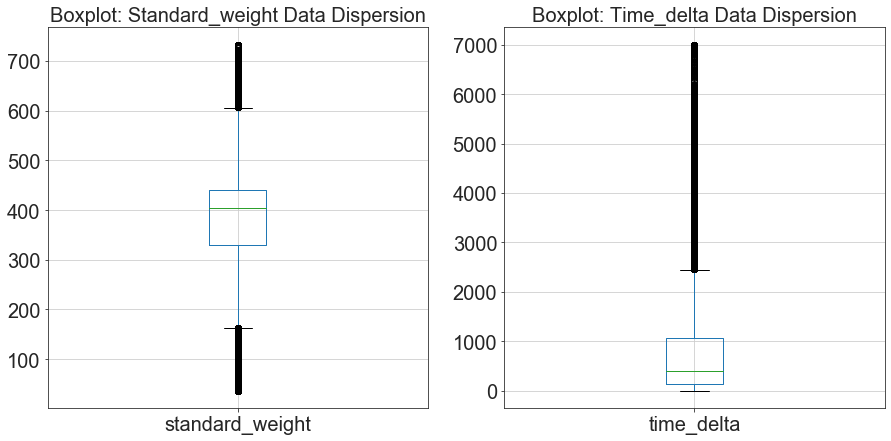

In [164]:
# Box plot certain features to see data dispersion 
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
audit_df.boxplot(column=['standard_weight'])
plt.title('Boxplot: Standard_weight Data Dispersion', size= 20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.subplot(1,2,2)
audit_df.boxplot(column=['time_delta'])
plt.title('Boxplot: Time_delta Data Dispersion', size= 20)
plt.xticks(size=20)
plt.yticks(size=20)

In [165]:
# Drop any remainging nan values and write dataset to a new file for modeling
# audit_df.dropna(inplace=True)

audit_df.to_csv(path + 'audit_clean_dataset.csv')

## The Final Dataframe for modeling

In [166]:
audit_df_src = audit_df.drop(labels=['device_type', 
                                     'device_id',
                                     'device_code',
                                     'package_id',
                                     'package_date',
                                     'id',
                                     'material_type',
                                     'unit',
                                     'net_weight',
                                     'tare_weight',
                                     'gross_weight',
                                     'standard_w_avg',
                                     'standard_w_std',
                                     'material_description_from_original',
                                     'material_class_from_original',
                                     'mad_weight',
                                     'weight_var_index',
                                     'package_date_f',
                                     'mad_var',
                                     'duplicate_counts',
                                     'audited',
                                     'audit_status',
                                     'material','barcode'] ,axis=1)

## Categorical variables

In [167]:
pd_cat_material = pd.get_dummies(audit_df['material'], prefix='material_', drop_first=False)
pd_cat_material.drop(columns='material__OTHER', inplace=True)
pd_cat_material.head(2)

,material__FILM,material__OCC
49319,0,1
61826,0,1


In [168]:
audit_plot = pd.concat([audit_df_src, pd_cat_material], axis=1)

In [169]:
audit_plot.to_csv(path + 'audit-clean-dataset-to-model.csv')

# Plots

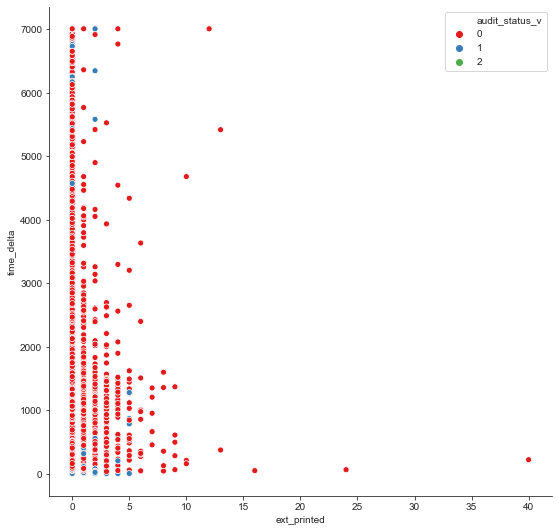

In [170]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)

sns.scatterplot(x='ext_printed',y='time_delta',data=audit_plot, hue='audit_status_v', palette="Set1")
sns.despine()

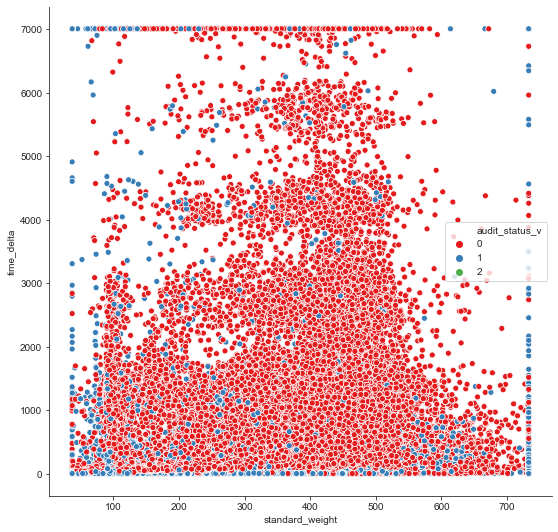

In [171]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(9, 9)

sns.scatterplot(x='standard_weight',y='time_delta',data=audit_plot, hue='audit_status_v', palette="Set1")
sns.despine()

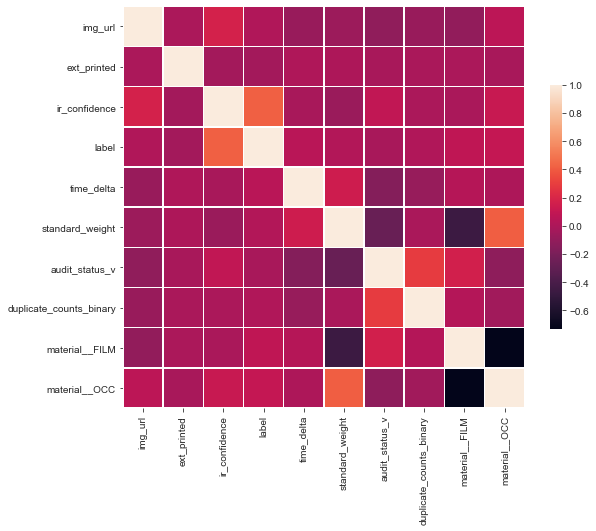

In [172]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(audit_plot.corr(), 
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

plt.show()

# Model Creation

## Application of Classification Models with Supervised Learning using Balanced Data

The data set is the audit tool data set (seperate file) which has already gone through an EDA process and includes several new features to enhance the data set.  

This notebook will apply the follwing models:

1. Decision Tree
2. Random Forest
3. KNN


scaler = MinMaxScaler()

audit_df_src['time_delta'] = scaler.fit_transform(audit_df_src[['time_delta']])
audit_df_src['gross_weight'] = scaler.fit_transform(audit_df_src[['gross_weight']])

# Split data in Training and Validation Sets

In [173]:
df_model = audit_plot

In [174]:
# Define the X and Y variables
X = df_model[['standard_weight',
           'material__FILM',
           'material__OCC',
           'img_url',
           'label',
           'time_delta',
           'duplicate_counts_binary']]

y = df_model['audit_status_v'] # binary output

In [175]:
#Train, test split the dataset prior to balancing
X1_Train, X1_Validation, y1_train, y1_validation = train_test_split(X, y, test_size=.3, stratify=y)

# Feature engineering

## Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_Train = sc.fit_transform(X1_Train)
X1_Validation  = sc.transform(X1_Validation)

## Under sampling

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X1_Train, y1_train)
print(sorted(Counter(y_resampled).items()))

## Over sampling

In [178]:
# Balanced the data for the clsutering models
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek # over-sampling using SMOTE

# define the parameters for
smote_enn   = SMOTEENN  (random_state=0)
smote_tomek = SMOTETomek(random_state=0)

#Will only balance the training
X1_over_sampled, y1_over_sampled = smote_tomek.fit_resample(X1_Train, y1_train)

X1_under_sampled, y1_under_sampled = smote_enn.fit_resample(X1_Train, y1_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6

In [ ]:
print('Over Resampled dataset shape %s' % Counter(y1_over_sampled))

In [ ]:
print('Under Resampled dataset shape %s' % Counter(y1_under_sampled))

In [179]:
X1_Train = X1_under_sampled
y1_train = y1_under_sampled

# Split data in Train and Test sets for models

In [180]:
X2_Train, X2_Test, y2_train, y2_test = train_test_split(X1_resampled,
                                                        y1_resampled,
                                                        test_size = .3) 

# Model Creation 

## Decision Tree Model

In [181]:
# Call and fit the model
decision_tree = DecisionTreeClassifier(
    criterion = 'entropy', 
    max_features = 2,
    max_depth = 7,
    random_state = 0
)

decision_tree.fit(X2_Train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [182]:
# Use the decision tree model to predict in the Test Set
y_pred_dt = decision_tree.predict(X2_Test)

print('DT Accuracy Score       :'  , round(accuracy_score(y2_test, y_pred_dt),4))
print('DT Classification Report:\n', classification_report(y2_test, y_pred_dt))

DT Accuracy Score       : 0.7977
DT Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76     10737
           1       0.76      0.67      0.71     14204
           2       0.93      0.88      0.90     15866

    accuracy                           0.80     40807
   macro avg       0.79      0.80      0.79     40807
weighted avg       0.81      0.80      0.80     40807



In [183]:
# Use the decision tree model to predict in the Validation Set
y_pred_dt_validation = decision_tree.predict(X1_Validation)

print('DT Accuracy Score       :', round(accuracy_score(y1_validation, y_pred_dt_validation),4))
print('DT Classification Report:\n', classification_report(y1_validation, y_pred_dt_validation))

DT Accuracy Score       : 0.7075
DT Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.77      0.87     26267
           1       0.10      0.16      0.12      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.71     29378
   macro avg       0.36      0.64      0.33     29378
weighted avg       0.89      0.71      0.79     29378



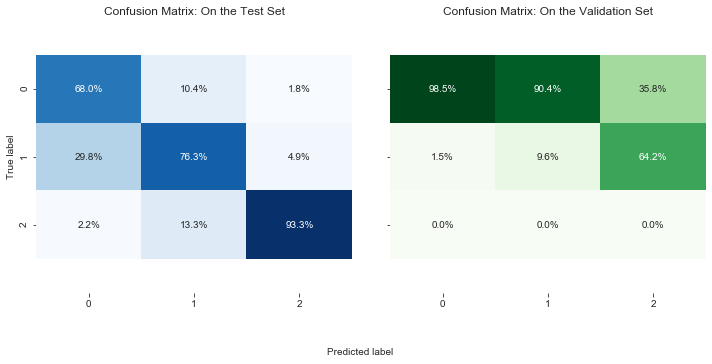

In [184]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_dt, y1_validation, y_pred_dt_validation, labels)

## Random Forest Model
### Model: Defatul Parameters

In [185]:
# Define and fit the model
rfc = RandomForestClassifier()
rfc.fit(X2_Train, y2_train)

# Use the model to predict
y_pred_rfc = rfc.predict(X2_Test)

print('RFC Accuracy Score:', round(accuracy_score(y2_test, y_pred_rfc) , 4))
print('RFC Classification Report:\n', classification_report(y2_test, y_pred_rfc))

RFC Accuracy Score: 0.9791
RFC Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     10737
           1       0.97      0.98      0.98     14204
           2       0.99      0.99      0.99     15866

    accuracy                           0.98     40807
   macro avg       0.98      0.98      0.98     40807
weighted avg       0.98      0.98      0.98     40807



In [186]:
# Now use the decision tree model to predict in the Validation Set
y_pred_rfc_validation = rfc.predict(X1_Validation)

print('DT Accuracy Score       :', round(accuracy_score(y1_validation, y_pred_rfc_validation),4))
print('DT Classification Report:\n', classification_report(y1_validation, y_pred_rfc_validation))

DT Accuracy Score       : 0.7741
DT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92     26267
           1       0.10      0.10      0.10      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.77     29378
   macro avg       0.36      0.65      0.34     29378
weighted avg       0.90      0.77      0.83     29378



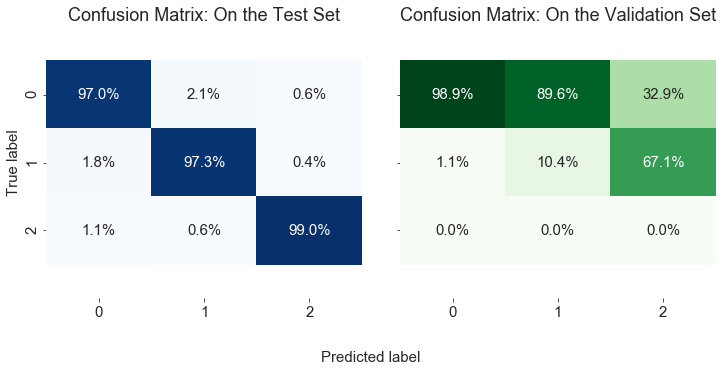

In [187]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_rfc, y1_validation, y_pred_rfc_validation, labels)

Text(0.5, 1.0, 'Random Forest Feature Importance')

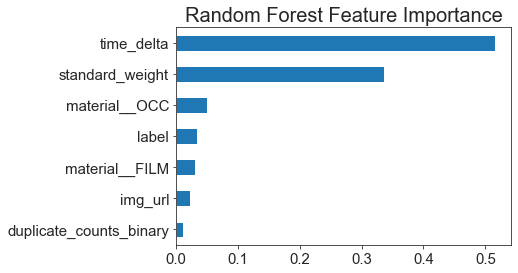

In [188]:
# Plot the important features of the model
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending = True).plot(kind='barh')
plt.title('Random Forest Feature Importance', fontsize = 20)

### Model: Tune Parameters

In [189]:
# Define and fit the model
rfc2 = RandomForestClassifier(n_estimators = 20,
                               n_jobs = -1,
                               max_features = 'log2',
                               max_depth = 15,
                               oob_score = True,
                               bootstrap = True,
                               random_state = 42)

rfc2.fit(X2_Train, y2_train)

# Use the model to predict
y_pred_rfc2 = rfc2.predict(X2_Test)

print('RFC Prediction Accuracy Score:', round(accuracy_score(y2_test, y_pred_rfc2),4))
print('RFC Out-of-Bag Score:{:2f}' .format(rfc2.oob_score_))
print('RFC Classification Report:\n', classification_report(y2_test, y_pred_rfc2))

C:\Users\jmedel\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\jmedel\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RFC Prediction Accuracy Score: 0.9428
RFC Out-of-Bag Score:0.935010
RFC Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91     10737
           1       0.93      0.92      0.93     14204
           2       0.99      0.97      0.98     15866

    accuracy                           0.94     40807
   macro avg       0.94      0.94      0.94     40807
weighted avg       0.94      0.94      0.94     40807



In [190]:
# Now use the decision tree model to predict in the Validation Set
y_pred_rfc2_validation = rfc2.predict(X1_Validation)

print('DT Accuracy Score       :', round(accuracy_score(y1_validation, y_pred_rfc2_validation),4))
print('DT Classification Report:\n', classification_report(y1_validation, y_pred_rfc2_validation))

DT Accuracy Score       : 0.7474
DT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     26267
           1       0.09      0.10      0.09      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.75     29378
   macro avg       0.36      0.64      0.33     29378
weighted avg       0.89      0.75      0.81     29378



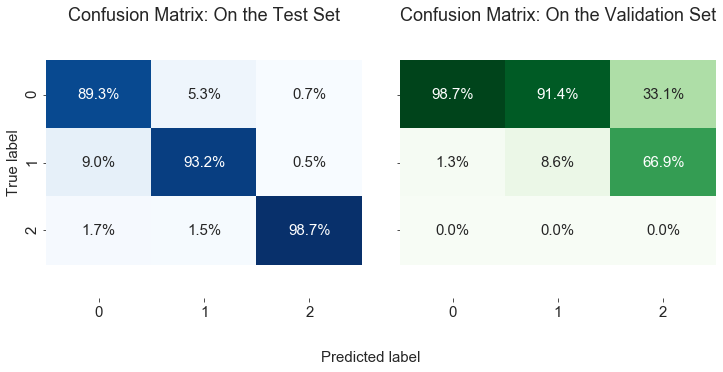

In [191]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_rfc2, y1_validation, y_pred_rfc2_validation, labels)

### Model: GridSearch

In [192]:
# Set up parameters for graphing function
n_estimators = [15,20,25,30]                                                   #range of estimators
max_features = ['auto', 'sqrt', 'log2']                                        #features options of rfc
param_grid = dict(n_estimators = n_estimators, max_features = max_features)    #define dictionary
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)                #define the model
grid.fit(X2_Train, y2_train)                                               #fit the parameters into a model
print('RFC Grid Search Best parameters:', grid.best_params_)

RFC Grid Search Best parameters: {'max_features': 'sqrt', 'n_estimators': 25}


In [193]:
# Use the model to predict
y_pred_grid = grid.predict(X2_Test)

print('RFC Prediction Accuracy Score:', round(accuracy_score(y2_test, y_pred_grid),4))
print('RFC Classification Report:\n', classification_report(y2_test, y_pred_grid))

RFC Prediction Accuracy Score: 0.9777
RFC Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97     10737
           1       0.97      0.98      0.98     14204
           2       0.99      0.99      0.99     15866

    accuracy                           0.98     40807
   macro avg       0.98      0.98      0.98     40807
weighted avg       0.98      0.98      0.98     40807



In [194]:
# Now use the decision tree model to predict in the Validation Set
y_pred_grid_validation = grid.predict(X1_Validation)

print('DT Accuracy Score       :', round(accuracy_score(y1_validation, y_pred_grid_validation),4))
print('DT Classification Report:\n', classification_report(y1_validation, y_pred_grid_validation))

DT Accuracy Score       : 0.7716
DT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91     26267
           1       0.10      0.10      0.10      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.77     29378
   macro avg       0.36      0.65      0.34     29378
weighted avg       0.89      0.77      0.83     29378



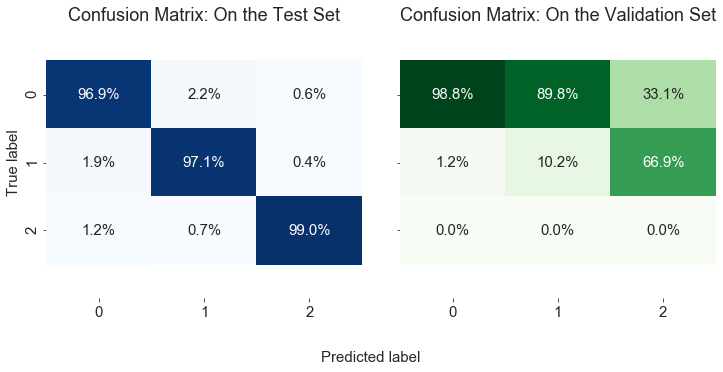

In [195]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_grid, y1_validation, y_pred_grid_validation, labels)

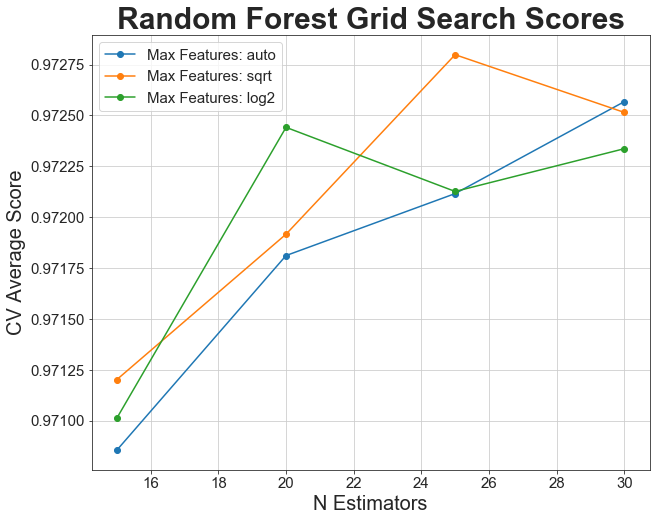

In [196]:
# Define function for plotting the varying estimators and features
def rfc_plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(figsize=(10, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Random Forest Grid Search Scores", fontsize=30, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=20)
    ax.set_ylabel('CV Average Score', fontsize=20)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Call the function 
rfc_plot_grid_search(grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

## KNN Classifier

In [197]:
#Fit the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X2_Train, y2_train)

#Use the model to predict
y_pred_knn = knn.predict(X2_Test)

print('KNN Accuracy Score:'         , round(accuracy_score(y2_test, y_pred_knn),4))
print('KNN Classification Report:\n', classification_report(y2_test, y_pred_knn))

KNN Accuracy Score: 0.9907
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     10737
           1       0.99      0.99      0.99     14204
           2       0.99      0.99      0.99     15866

    accuracy                           0.99     40807
   macro avg       0.99      0.99      0.99     40807
weighted avg       0.99      0.99      0.99     40807



In [198]:
# Now use the decision tree model to predict in the Validation Set
y_pred_knn_validation = knn.predict(X1_Validation)

print('VT Accuracy Score       :'  , round(accuracy_score(y1_validation, y_pred_knn_validation),4))
print('VT Classification Report:\n', classification_report(y1_validation, y_pred_knn_validation))

VT Accuracy Score       : 0.6909
VT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     26267
           1       0.08      0.12      0.09      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.69     29378
   macro avg       0.36      0.63      0.32     29378
weighted avg       0.89      0.69      0.78     29378



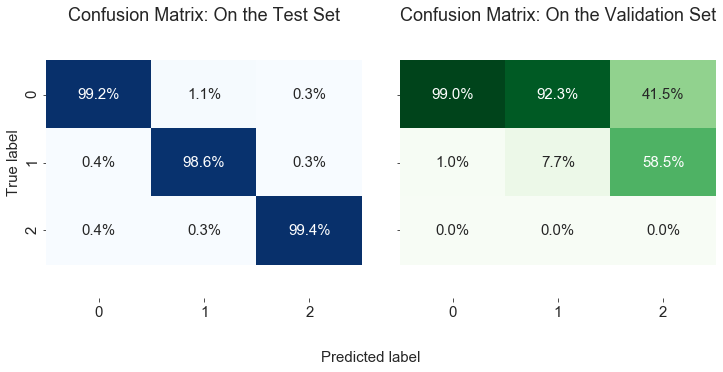

In [199]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_knn, y1_validation, y_pred_knn_validation, labels)

In [200]:
# Use cross validation to identify optimal 'k' number
# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X2_Train, y2_train, cv=5)

# print each cv score (accuracy) and average them
print('KNN Cross Validation Scores:\n', cv_scores)
print('KNN Average CV Score:{:4f}'.format(np.mean(cv_scores)))

KNN Cross Validation Scores:
 [0.9740062  0.96980518 0.97216825 0.97206323 0.97201071]
KNN Average CV Score:0.972011


In [201]:
#create new a knn model
KNN_gs = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(5, 10)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(KNN_gs, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X2_Train, y2_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [202]:
#check top performing n_neighbors value
print('Best Performing n of neighbors:', knn_gscv.best_params_)
print('KNN_Gridsearch Best Score: {:2f}'.format(knn_gscv.best_score_))

Best Performing n of neighbors: {'n_neighbors': 5}
KNN_Gridsearch Best Score: 0.959009


In [203]:
#Set up parameters for graphing function
n_neighbors = [1, 5, 10, 15, 20]    
weights = ['uniform', 'distance']
knn_param_grid = dict(n_neighbors = n_neighbors, weights = weights)
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(X2_Train, y2_train)
#print(grid.grid_scores_)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [204]:
#Use the model to predict
y_pred_knn_grid = knn_grid.predict(X2_Test)

print('KNN Accuracy Score:'         , round(accuracy_score(y2_test, y_pred_knn_grid),4))
print('KNN Classification Report:\n', classification_report(y2_test, y_pred_knn_grid))

KNN Accuracy Score: 0.9907
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     10737
           1       0.99      0.99      0.99     14204
           2       0.99      0.99      0.99     15866

    accuracy                           0.99     40807
   macro avg       0.99      0.99      0.99     40807
weighted avg       0.99      0.99      0.99     40807



In [205]:
# Now use the decision tree model to predict in the Validation Set
y_pred_knn_grid_validation = knn.predict(X1_Validation)

print('DT Accuracy Score       :', round(accuracy_score(y1_validation, y_pred_knn_grid_validation),4))
print('DT Classification Report:\n', classification_report(y1_validation, y_pred_knn_grid_validation))

DT Accuracy Score       : 0.6909
DT Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.76      0.86     26267
           1       0.08      0.12      0.09      3110
           2       0.00      1.00      0.00         1

    accuracy                           0.69     29378
   macro avg       0.36      0.63      0.32     29378
weighted avg       0.89      0.69      0.78     29378



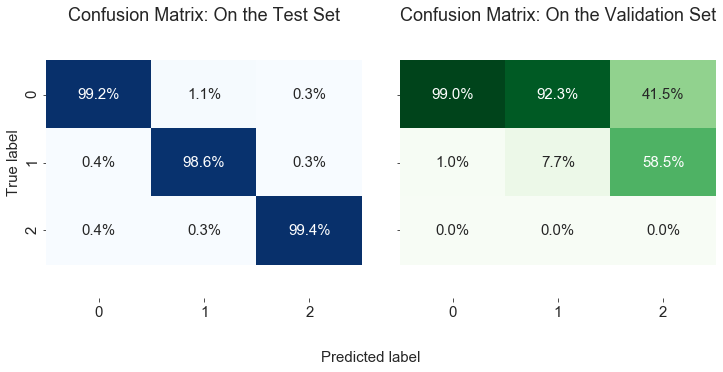

In [206]:
labels  = unique_labels(audit_plot['audit_status_v'])
plot_confusion_matrix(y2_test, y_pred_knn_grid, y1_validation, y_pred_knn_grid_validation, labels)

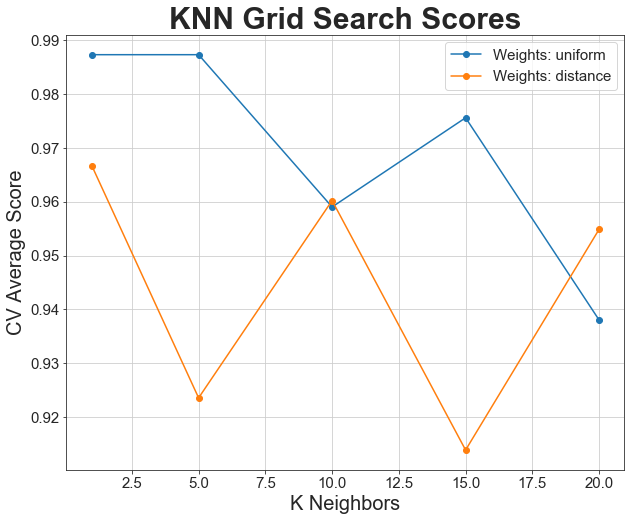

In [207]:
def knn_plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    #fig, ax = plt.subplots(figsize=(10, 8))
    _, ax = plt.subplots(figsize=(10, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("KNN Grid Search Scores", fontsize = 30, fontweight = 'bold')
    ax.set_xlabel(name_param_1, fontsize = 20)
    ax.set_ylabel('CV Average Score', fontsize = 20)
    ax.legend(loc = "best", fontsize = 15)
    ax.grid('on')

# Calling Method 
knn_plot_grid_search(knn_grid.cv_results_, n_neighbors, weights, 'K Neighbors', 'Weights')

# Save Models

In [208]:
KNN_X_Test.iloc[0]

NameError: name 'KNN_X_Test' is not defined

In [ ]:
one_Prediction = [[10, 0, 1, 1, 1, 1*30, 0]]

In [ ]:
knn.predict(one_Prediction)

In [ ]:
knn_gscv.predict(one_Prediction)

In [ ]:
knn_grid.predict(one_Prediction)

In [ ]:
dump(knn, 'knn.joblib')
dump(knn_gscv, 'knn_gscv.joblib')
dump(knn_grid, 'knn_grid.joblib') 

In [ ]:
clf = load('knn.joblib') 

In [ ]:
clf.predict(one_Prediction)

In [177]:
def plot_confusion_matrix(X_test, y_test, X_val, y_val, labels):
    # Create the heatmap/confusion matrix for each set
    test_cm = confusion_matrix(X_test, y_test, labels)
    val_cm  = confusion_matrix(X_val, y_val, labels)

    # Transform confusion matrix into dataframe for visualizing
    test_cm_df = pd.DataFrame(test_cm,
                         index   = labels, 
                         columns = labels)

    val_cm_df = pd.DataFrame(val_cm,
                         index   = labels, 
                         columns = labels)

    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,5))
    fig.subplots_adjust(wspace=.12)

    #first plot
    sns.heatmap(test_cm_df/np.sum(test_cm_df), ax=ax1, annot=True, cbar=False, fmt='.1%', cmap='Blues')
    bottom, top = ax1.get_ylim()
    ax1.set_ylim(bottom + 0.5, top - 0.5)
    ax1.set_title('Confusion Matrix: On the Test Set')
    ax1.set_ylabel('True label')
    #ax1.set_xlabel('Predicted label')

    #second plot
    sns.heatmap(val_cm_df/np.sum(val_cm_df), ax=ax2, annot=True, cbar=False, fmt='.1%', cmap='Greens')
    bottom, top = ax2.get_ylim()
    ax2.set_ylim(bottom + 0.5, top - 0.5)
    ax2.set_title('Confusion Matrix: On the Validation Set')
    #ax2.set_ylabel('True label')
    #ax2.set_xlabel('Predicted label')

    fig.text(.5, -0.04, 'Predicted label', ha='center', va='center')
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = "15"
    plt.show()